# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.120273e+01     7.802450e+00
 * time: 0.002318859100341797
     1     2.831250e+01     4.637314e+00
 * time: 0.009737014770507812
     2     1.970840e+01     4.294624e+00
 * time: 0.018795013427734375
     3     1.296259e+01     3.133494e+00
 * time: 0.026807069778442383
     4     1.100287e+01     1.640272e+00
 * time: 0.034436941146850586
     5     1.013589e+01     3.203554e+00
 * time: 0.04042696952819824
     6     9.674510e+00     1.321498e+00
 * time: 0.04642605781555176
     7     9.199432e+00     1.274329e+00
 * time: 0.052208900451660156
     8     8.769555e+00     9.949132e-01
 * time: 0.09189605712890625
     9     8.418140e+00     8.777072e-01
 * time: 0.09673690795898438
    10     8.239489e+00     6.523180e-01
 * time: 0.10144400596618652
    11     8.118003e+00     4.971044e-01
 * time: 0.10610508918762207
    12     8.054465e+00     6.470338e-01
 * time: 0.10976290702819824
    13     8.001643e+00     5.371931e-01
 *

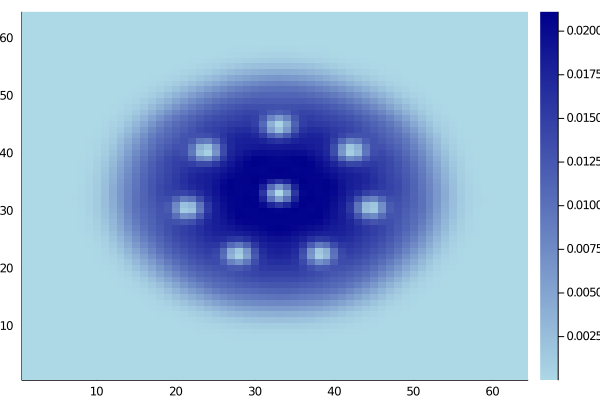

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)